169001437/169001437 [==============================] - 15s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 64)          36928     
                                                      

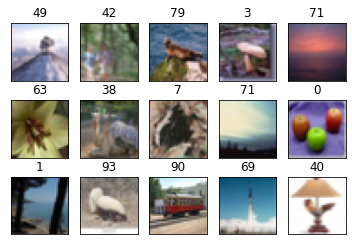

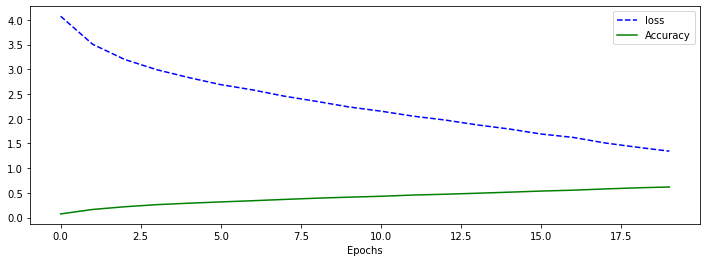

In [ ]:
from keras.layers.normalization.batch_normalization_v1 import BatchNormalization
import numpy as np
import tensorflow as tf
import matplotlib.pylab as plt

from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Flatten, LSTM, Reshape, Conv2D, MaxPooling2D, Bidirectional, Dropout, GRU
from keras.optimizers import Adam, SGD, Adadelta

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar100.load_data()

train_images = train_images.reshape((50000, 32, 32, 3))
test_images = test_images.reshape((10000, 32, 32, 3))

train_images = train_images / 255.0
test_images = test_images / 255.0

one_hot_train_labels = to_categorical(train_labels, 100)
one_hot_test_labels = to_categorical(test_labels, 100)

#cnn model
model = Sequential()
#conv2d
model.add(Conv2D(32, (3, 3), activation = 'relu', strides = (1, 1), padding = 'same', input_shape = (32, 32, 3)))
#max pooling layer
model.add(MaxPooling2D((2, 2)))
#conv2d
model.add(Conv2D(64, (3, 3), activation = 'relu'))
#max pooling layer
model.add(MaxPooling2D((2, 2)))
#conv2d
model.add(Conv2D(64, (3, 3), activation = 'relu'))

#reshape
model.add(Reshape(target_shape = (64, 5*5)))

#LSTM
model.add(Bidirectional(LSTM(units = 32, return_sequences = True, input_shape = (64, 5*5))))
model.add(Bidirectional(LSTM(units = 32, return_sequences = True)))
model.add(Bidirectional(LSTM(units = 32, return_sequences = True)))

#Flatten
model.add(Flatten())
#FC
model.add(Dense(128, activation = 'relu'))
model.add(Dense(100, activation = 'softmax'))

#compile
model.compile(
    optimizer = Adam(0.001),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
    )
#summary
model.summary()
#fit
history = model.fit(train_images, one_hot_train_labels, epochs = 20, batch_size = 128, validation_split = 0.2)

#predict, evaluate
import numpy as np

labels = model.predict(test_images)

print("Accuracy : %4f" %(model.evaluate(test_images, one_hot_test_labels)[1]))

fig = plt.figure()
for i in range(15):
  subplot = fig.add_subplot(3, 5, i + 1)
  subplot.set_xticks([])
  subplot.set_yticks([])
  subplot.set_title(np.argmax(labels[i]))
  subplot.imshow(test_images[i].reshape(32, 32, 3))
plt.show()

plt.figure(figsize = (12, 4))
plt.subplot(1,1,1)
plt.plot(history.history['loss'], 'b--', label = 'loss')
plt.plot(history.history['accuracy'], 'g-', label = 'Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()